In [1]:
import json
from nltk.tokenize import word_tokenize
from nltk.corpus import wordnet
from collections import Counter
import re
import matplotlib.pyplot as plt
import numpy as np
import difflib
import spacy
import spacy.cli
import nltk
# spacy.cli.download("en_core_web_sm")
from nltk.corpus import stopwords
nltk.download('vader_lexicon')
import csv
import pandas as pd

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\GS\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
path = 'C:/Hammad Aslam/BS IT (post ADP)/3rd Semester/Capstone Project/Project/backend/practice/colabCodes/trainedData'
file_path_1 = path+'/cellPhonesAndAccessories.csv'
file_path_2 = path+'/clothingShoesAndJewelry.csv'
file_path_3 = path+'/electronics.csv'
file_path_4 = path+'/homeAndKitchen.csv'
file_path_5 = path+'/toolsAndHomeImprovements.csv'

# Read the CSV file into a DataFrame
merged_df1 = pd.read_csv(file_path_1)
merged_df2 = pd.read_csv(file_path_2)
merged_df3 = pd.read_csv(file_path_3)
merged_df4 = pd.read_csv(file_path_4)
merged_df5 = pd.read_csv(file_path_5)

C:\Users\GS\AppData\Local\Temp\ipykernel_9736\3352990186.py:10: DtypeWarning: Columns (24) have mixed types. Specify dtype option on import or set low_memory=False.
  merged_df2 = pd.read_csv(file_path_2)
C:\Users\GS\AppData\Local\Temp\ipykernel_9736\3352990186.py:11: DtypeWarning: Columns (16,24) have mixed types. Specify dtype option on import or set low_memory=False.
  merged_df3 = pd.read_csv(file_path_3)
C:\Users\GS\AppData\Local\Temp\ipykernel_9736\3352990186.py:13: DtypeWarning: Columns (16,23,24) have mixed types. Specify dtype option on import or set low_memory=False.
  merged_df5 = pd.read_csv(file_path_5)


In [3]:
# Concatenate the DataFrames
merged_df = pd.concat([merged_df1, merged_df2, merged_df3, merged_df4, merged_df5], ignore_index=True)
merged_df.groupby('y').size()

y
0     80000
1    120000
dtype: int64

In [4]:
merged_df.head()

,rating,title_x,text,images_x,asin,parent_asin,user_id,timestamp,helpful_vote,verified_purchase,...,similarity_text_description,similarity_text_features,similarity_text_categories,similarity_text_details,sentiment_scores,review_length,reviews_count,avg_review_length,avg_rating,avg_helpful_votes
0,5.0,EXCELLENT PRODUCT,i purchase these for all my phones (when i get...,[],B01EBHQJH0,B01EBHQJH0,AHGAOIZVODNHYMNCBV4DECZH42UQ,1468269010000,31,True,...,0.000000,0.000000,0.000000,0.434029,0.8264,610,15,268.266667,3.2,2.466667
1,1.0,dead wont charge anymore after a few times,UPDATE: purchased 6/20/18 ..... it only ch...,[],B01LBI132I,B01LBI132I,AHGAOIZVODNHYMNCBV4DECZH42UQ,1530216608086,0,True,...,0.112744,0.672189,0.195206,0.525677,0.9346,424,15,268.266667,3.2,2.466667
2,5.0,i loveeeeeeeee this product,was looking for something ilke this forever g...,[],B01HXK7SXG,B07V9DZXCH,AHGAOIZVODNHYMNCBV4DECZH42UQ,1649295322777,0,True,...,0.081242,0.684680,0.208401,0.612427,0.9059,263,15,268.266667,3.2,2.466667
3,5.0,love it,but the wires are really long i ordered one t...,[],B07KP49H6C,B0962TV1BY,AHGAOIZVODNHYMNCBV4DECZH42UQ,1565203442207,2,True,...,0.518705,0.528066,0.104617,0.701262,0.9495,285,15,268.266667,3.2,2.466667
4,1.0,disappointed :(,being returned too bouncy,[],B07G56PZH5,B07P5MWC5W,AHGAOIZVODNHYMNCBV4DECZH42UQ,1570129626580,0,True,...,0.693231,0.129372,0.558001,0.078971,0.0000,26,15,268.266667,3.2,2.466667


In [21]:
# for index in range(len(data)):
def get_topics():
    positive_topics = []
    negative_topics = []
    for index, row in merged_df.iterrows():
        # print(f"{i}: {data[index]['reviews'][i]['review_helpfulness']}")
        # print(len(data[index]["reviews"]))
        if row['y'] ==1:
            for j in range(len(row['features'])):
                print(row['features'])
        #         positive_topics.append(row['features'][index][j])
        # if row['y'] ==0:
        #     for j in range(len(row['features'][index])):
        #         negative_topics.append(row['features'][index][j])
    return positive_topics, negative_topics


positive_topics, negative_topics = get_topics()
positive_topics = [topic for topic in positive_topics if topic != 'none']
negative_topics = [topic for topic in negative_topics if topic != 'none']
len(positive_topics), len(negative_topics)

(['netbook',
  'screen',
  'trackpad',
  'windows 7',
  'ubuntu',
  'small screen',
  'online banking',
  'long battery life',
  'portable',
  'nice looking',
  'recharger',
  'non-reflective',
  'shoulder bag',
  'lightweight',
  'Asus 1005HA-MU17',
  'paralegal program',
  'matte screen',
  'Windows 7 starter',
  'asus netbook',
  'mixed feelings',
  'asus 1005HA-MU17',
  'RAM',
  'HP 210-1090NR',
  'Windows 7 Home Premium',
  'Office 2007',
  'Atom N280',
  'Atom N450',
  'Corolla',
  'Avalon',
  'Asus netbook',
  'hardware failure',
  'warranty period',
  'power adapter',
  'Asus tech support',
  'incredulous',
  'Dell fullscale PC',
  'internet',
  'Linux Mint 18',
  'so-so performance',
  'responsive performance',
  'on-the-go device',
  'Asus netbook',
  'keyboard size',
  'keyboard ergonomics',
  'wide touchpad',
  'windows 7',
  'Asus Eee 1005HA',
  'mechanical design',
  'DDR2 memory',
  'good',
  'on-the-go purposes',
  'ideal piece of equipment',
  'new product',
  'Asus',


In [30]:
def get_synonyms(word):
    synonyms = set()
    for syn in wordnet.synsets(word):
        for lemma in syn.lemmas():
            synonyms.add(lemma.name().lower())  # Convert to lowercase for consistency
    return synonyms

# syn = list(get_synonyms(topics[9]))
# syn

In [31]:
def are_phrases_similar(phrase1, phrase2):
    # Tokenize and normalize phrases
    # tokens1 = set(word_tokenize(phrase1.lower()))
    # tokens2 = set(word_tokenize(phrase2.lower()))
    if phrase1 == phrase2:
        return True
    nlp = spacy.load("en_core_web_sm", disable=["parser", "ner"])
    new_record1 = re.sub(" +", " ",phrase1)
    new_record2 = re.sub(" +", " ",phrase2)
    doc1 = nlp(new_record1)
    doc2 = nlp(new_record2)
    for token in doc1:
        filtered_list = [token for token in doc1 if not token.is_stop]
        tokens1 = set([f"{token.lemma_}" for token in filtered_list])
        
    for token in doc2:
        filtered_list = [token for token in doc2 if not token.is_stop]
        tokens2 = set([f"{token.lemma_}" for token in filtered_list])
        
    # print(tokens1, tokens2)
    # Check if both phrases have similar tokens
    if tokens1 == tokens2:
        return True
    
    # Check for synonyms
    for token in tokens1:
        synonyms = get_synonyms(token)
        if tokens2.intersection(synonyms):
            return True
    
    return False

In [32]:
def are_similar(a, b, threshold=0.6):
    """
    Check if two strings are similar based on token similarity.
    """
    seq = difflib.SequenceMatcher(None, a, b)
    ratio = seq.ratio()
    # print(seq.ratio(), a, b)
    return ratio > threshold

In [33]:
def count_phrase_frequency_in_array(unique_array, original_array):
    frequency_counter = Counter()
    topicsCount = 0
    for i, phrase1 in enumerate(unique_array):
        count = 1
        for j, phrase2 in enumerate(original_array):
            if i != j:  # Avoid comparing a phrase with itself
                if are_phrases_similar(phrase1.lower(), phrase2.lower()):
                    count += 1
        frequency_counter[phrase1] = count
        topicsCount += 1
        print(topicsCount)
        # for phrase in original_array:
        #     if are_phrases_similar(phrase.lower(), phrase1.lower()):
        #         frequency_counter[phrase1] = count
    return frequency_counter


def get_unique(phrase_array):
    unique_pair = []
    count = 0
    for i in range(len(phrase_array)):
        for j in range(i+1, len(phrase_array)):
            if not are_phrases_similar(phrase_array[i], phrase_array[j]):
                # print(phrase_array[i], phrase_array[j])
                unique_pair.append(phrase_array[j])
        count += 1
        print(count)
    return unique_pair

In [34]:
# unique_positive = get_unique(positive_topics)
# unique_negative = get_unique(negative_topics)
frequency_positive = count_phrase_frequency_in_array(set(positive_topics), positive_topics)
frequency_negative = count_phrase_frequency_in_array(set(negative_topics), negative_topics)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18


In [35]:
# topics = []
for index in range(len(data)):
    data[index]['topic_frequency'] = []
    if index == 5:
        # for i in range(len(data[index]['reviews'])):
        # print(f"{(list(set(unique)))}\n{(dict(frequency))}")
        
        
        freq_pos = dict(frequency_positive)
        freq_neg = dict(frequency_negative)
        new_pos = len(freq_pos)
        new_neg = len(freq_neg)
        temp_pos = []
        temp_neg = []
        for key, value in freq_pos.items():
            temp_pos.append({'topic': key, 'freq': (int((value/new_pos)*100))})
        for key, value in freq_neg.items():
            temp_neg.append({'topic': key, 'freq': (int((value/new_pos)*100))})
        sorted_freq_pos = sorted(temp_pos, key=lambda x: x['freq'], reverse=True)
        sorted_freq_neg = sorted(temp_neg, key=lambda x: x['freq'], reverse=True)
        print(sorted_freq_pos)
        print(sorted_freq_neg)
        x_pos = []
        x_neg = []
        y_pos = []
        y_neg = []
        for k in sorted_freq_pos[0: 20]:
            x_pos.append(k['topic'])
            y_pos.append(k['freq'])
        for k in sorted_freq_neg[0: 20]:
            x_neg.append(k['topic'])
            y_neg.append(k['freq'])
            # print(k['freq'])
# unique

[{'topic': 'wine bottle', 'freq': 38}, {'topic': 'wine chiller', 'freq': 33}, {'topic': 'storage for red wines', 'freq': 33}, {'topic': 'wine cellar', 'freq': 33}, {'topic': 'poor cooling wine', 'freq': 33}, {'topic': '8-bottle cooler', 'freq': 22}, {'topic': 'refrigerator', 'freq': 16}, {'topic': 'temperature', 'freq': 16}, {'topic': 'beep', 'freq': 16}, {'topic': 'light flashing', 'freq': 16}, {'topic': 'beeping', 'freq': 16}, {'topic': 'lights flashing', 'freq': 16}, {'topic': 'dimensions', 'freq': 11}, {'topic': 'incorrect measurments', 'freq': 11}, {'topic': 'space', 'freq': 11}, {'topic': 'waste of money', 'freq': 11}, {'topic': 'fan running', 'freq': 11}, {'topic': 'leaking water', 'freq': 11}]
[]


18


C:\Users\GS\AppData\Local\Temp\ipykernel_17780\2154201842.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['0%', '20%', '40%', '60%', '80%', '100%'])


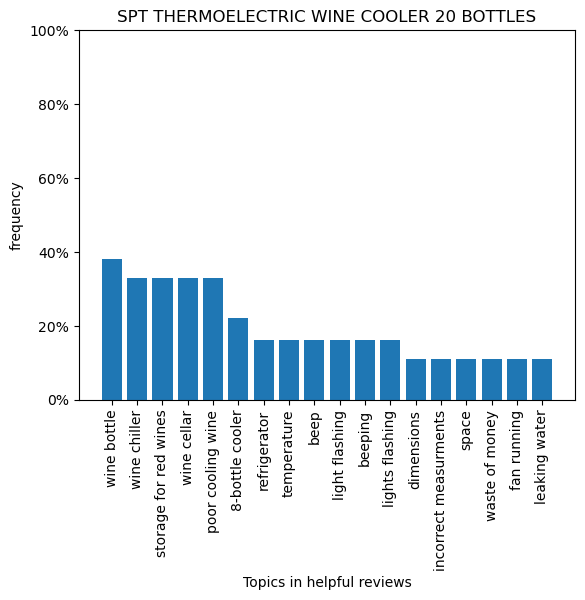

In [36]:
print(len(y_pos))
fig, ax = plt.subplots()
bars = ax.bar(x_pos, y_pos)
scaled_y = [val / max(y_pos) * 100 for val in y_pos]
# plt.bar(x, scaled_y)
ax.set_ylim(0, 100)
# ax.set_yticks([0, 25, 50, 75, 100])
ax.set_yticklabels(['0%', '20%', '40%', '60%', '80%', '100%'])
plt.xticks(rotation='vertical')
plt.xlabel('Topics in helpful reviews')
plt.ylabel('frequency')
# plt.yticks(y, ['{}%'.format(i) for i in y])
# plt.grid()
plt.title(title)
plt.show()


0


C:\Users\GS\AppData\Local\Temp\ipykernel_17780\2677328738.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['0%', '20%', '40%', '60%', '80%', '100%'])


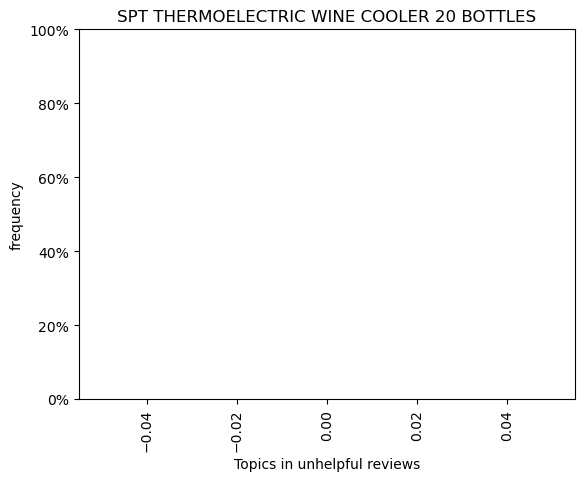

In [37]:
print(len(y_neg))
fig, ax = plt.subplots()
bars = ax.bar(x_neg, y_neg)
scaled_y = [val / max(y_neg) * 100 for val in y_neg]
# plt.bar(x, scaled_y)
ax.set_ylim(0, 100)
# ax.set_yticks([0, 25, 50, 75, 100])
ax.set_yticklabels(['0%', '20%', '40%', '60%', '80%', '100%'])
plt.xticks(rotation='vertical')

plt.xlabel('Topics in unhelpful reviews')
plt.ylabel('frequency')
# plt.yticks(y, ['{}%'.format(i) for i in y])
# plt.grid()
plt.title(title)
plt.show()
